In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


## Importing Libraries

In [2]:
import numpy as np   
np.random.seed(42)   
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from warnings import filterwarnings
filterwarnings("ignore") 

In [3]:
data  = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [4]:
print(data.shape)
print('\n')  ### Return the shape of data 
print(data.ndim)
print('\n')   ### Return the n dimensions of data
print(data.size)   ### Return the size of data 
print('\n')
print(data.isna().sum())
print('\n')  ### Returns the sum fo all na values
print(data.info())
print('\n')  ### Give concise summary of a DataFrame

(768, 9)


2


6912


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-

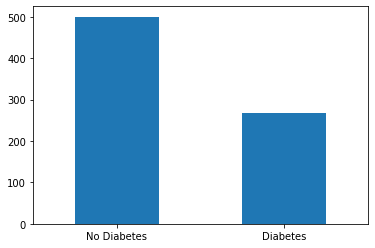

In [5]:
data["Outcome"].value_counts().plot(kind="bar")
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

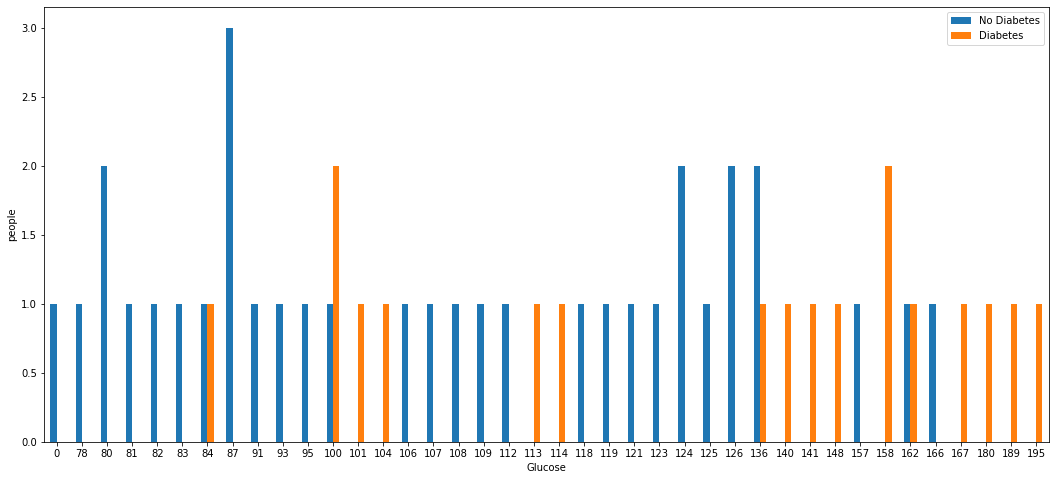

In [6]:
# Comparing Glucose with the Outcome
pd.crosstab(data.Glucose[::15],data.Outcome).plot(kind="bar",figsize=(18,8))
plt.ylabel("people");
plt.xticks(rotation=0);
plt.legend(['No Diabetes', 'Diabetes']);

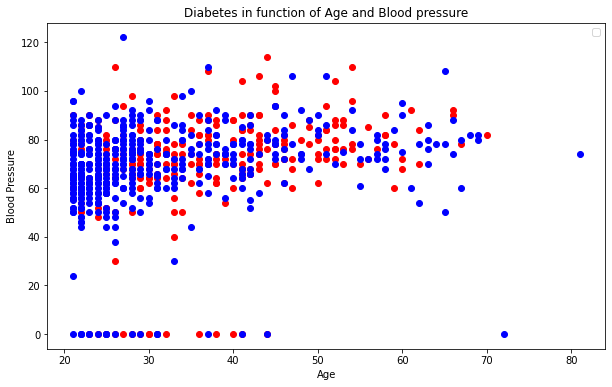

In [7]:
plt.figure(figsize=(10,6))
plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);
# Scatter with positive example
plt.scatter(data.Age[data.Outcome==1],data.BloodPressure[data.Outcome==1],c="Red");
# Scatter with negative example
plt.scatter(data.Age[data.Outcome==0],data.BloodPressure[data.Outcome==0],c="blue");


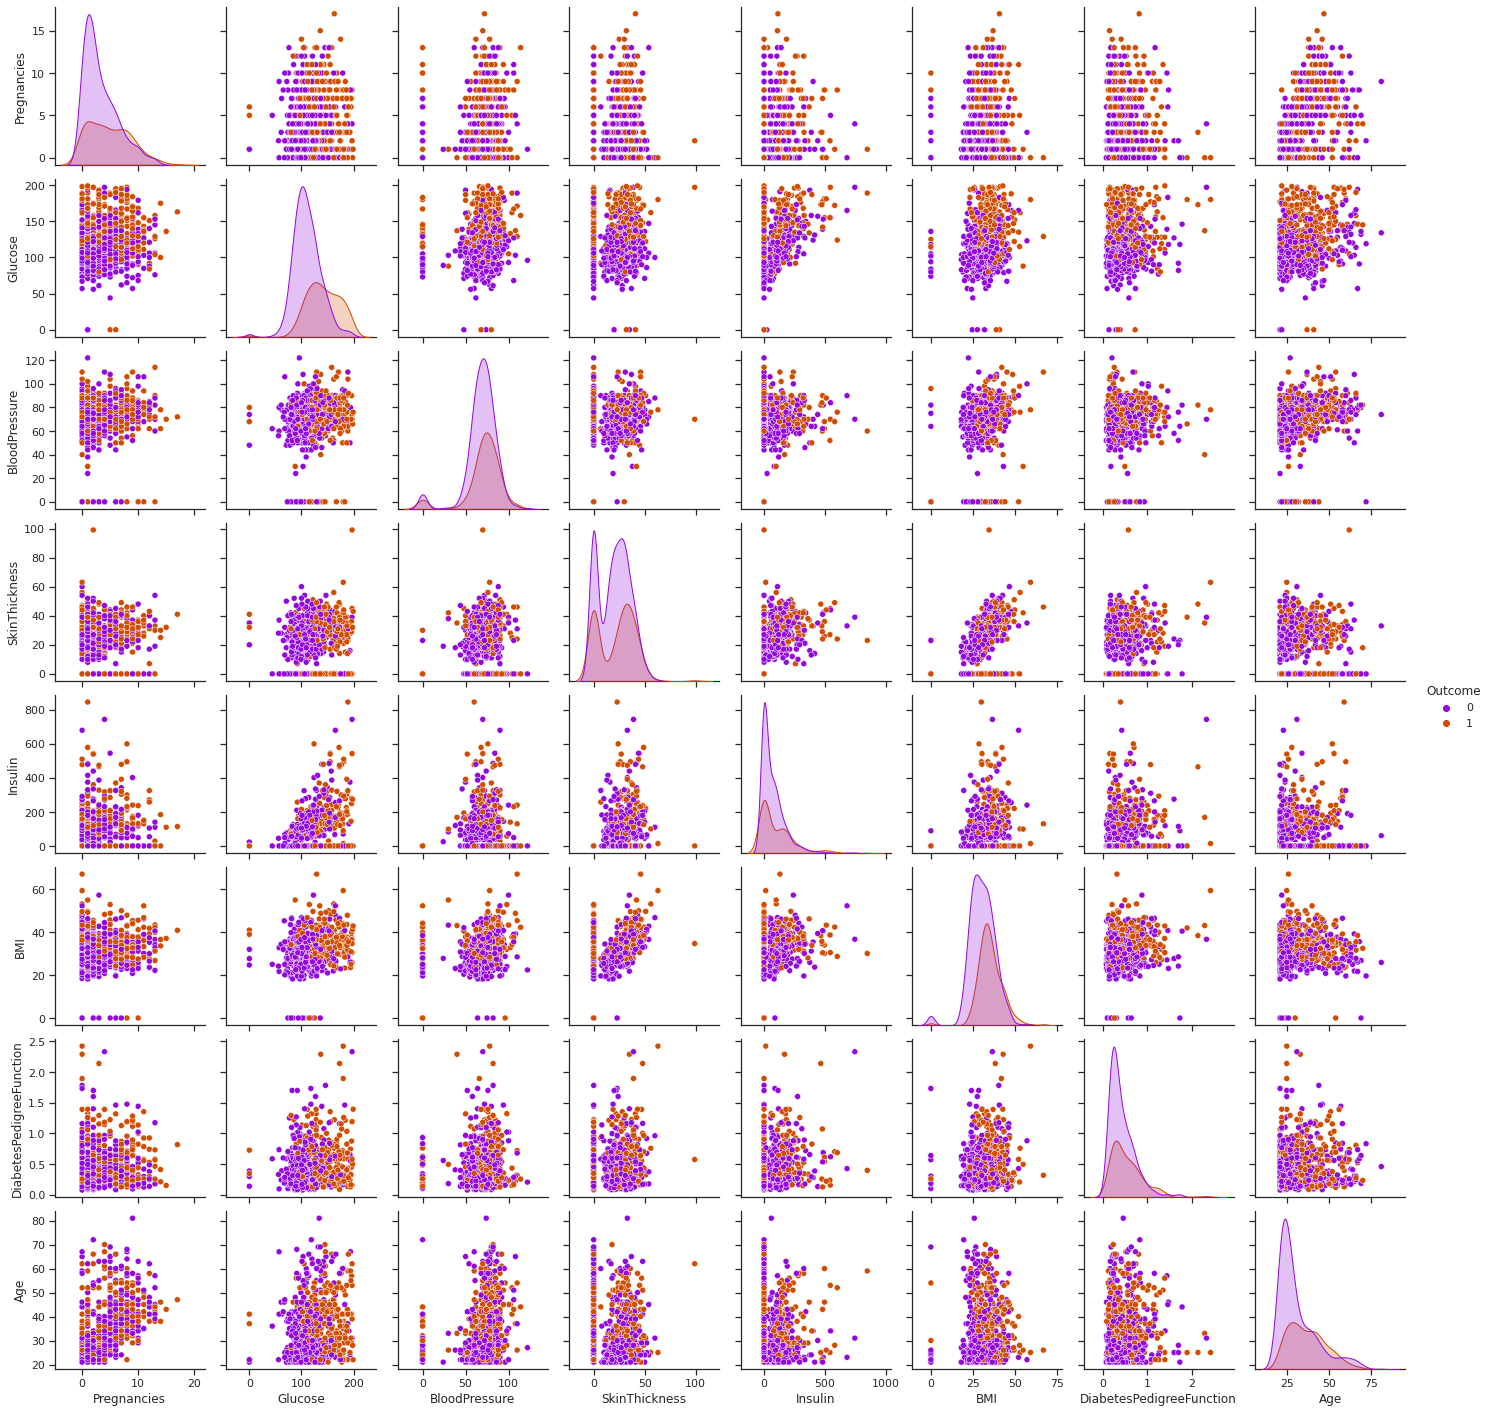

In [8]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,hue='Outcome',palette='gnuplot');

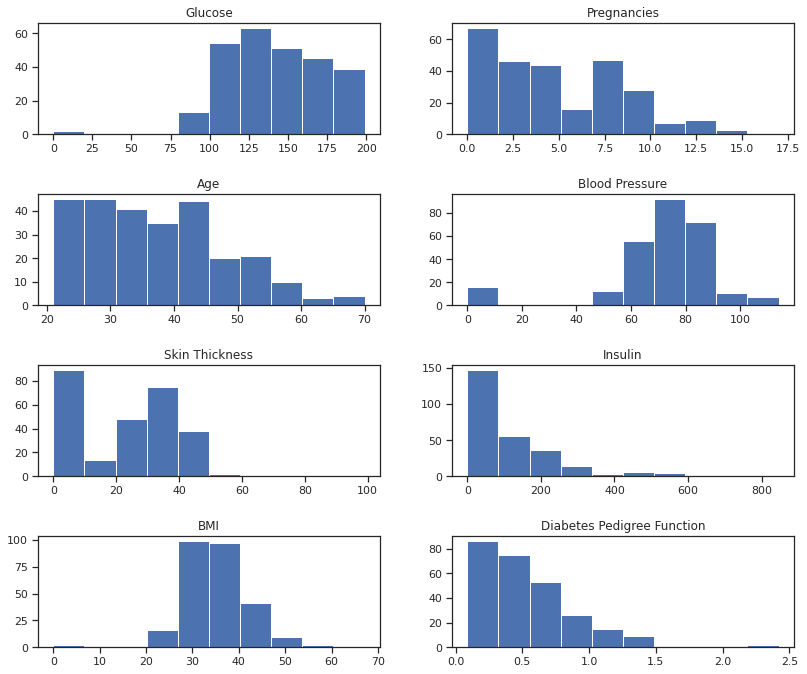

In [9]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(data.Glucose[data.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(data.Pregnancies[data.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(data.Age[data.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(data.BloodPressure[data.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(data.SkinThickness[data.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(data.Insulin[data.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(data.BMI[data.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(data.DiabetesPedigreeFunction[data.Outcome==1]);

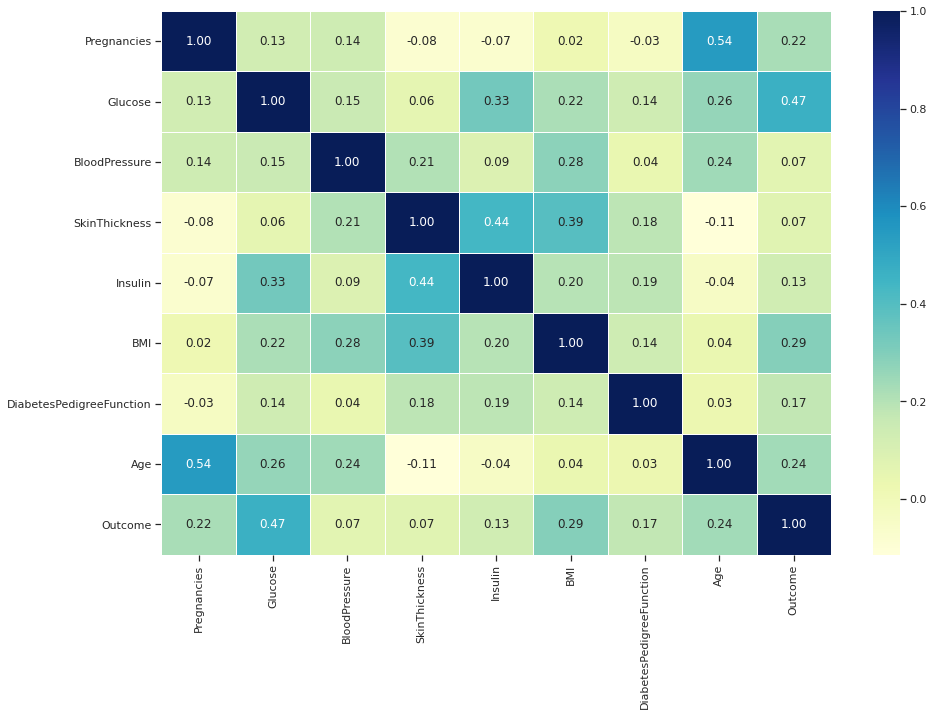

In [10]:
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",cmap="YlGnBu")

In [11]:
data.sample(frac=1)
#Spliting the data
X = data.drop("Outcome",axis=1)
y = data["Outcome"]
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)

## We are going to train our model on 4 algorithms
* Logistic Regression
* KNN
* Random Forest Classifier
* Support Vector Machine

In [12]:
## Build an model (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
## Evaluating the model
knn = knn.score(X_test,y_test)

In [13]:
## Build an model (Random forest classifier)
clf= RandomForestClassifier()
clf.fit(X_train,y_train);
## Evaluating the model
clf = clf.score(X_test,y_test)

In [14]:
## Build an model (Support Vector Machine)
svm = SVC()
svm.fit(X_train,y_train)
## Evaluating the model
svm = svm.score(X_test,y_test)

In [15]:
model_compare = pd.DataFrame({
"KNN":knn,
"Random Forest Classifier":clf,
"Support Vector Machine":svm,},
index=["accuracy"])

In [16]:
model_compare

,KNN,Random Forest Classifier,Support Vector Machine
accuracy,0.779221,0.785714,0.811688


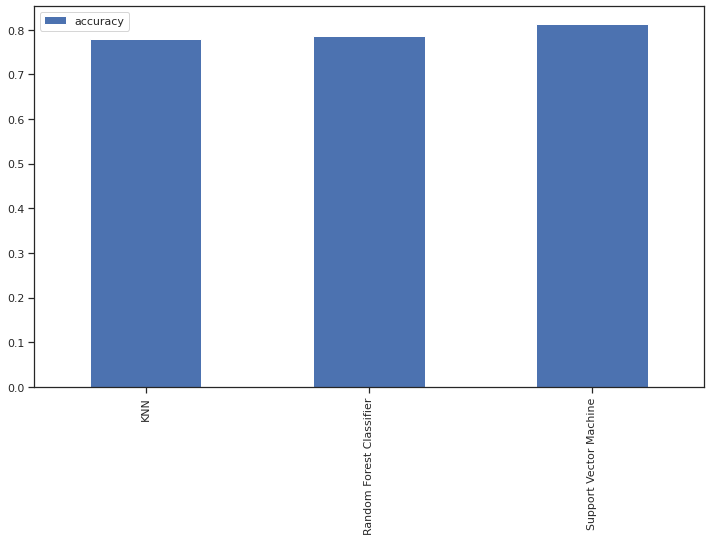

In [17]:
model_compare.T.plot.bar(figsize=(12,7));

In [18]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7578558696205755
Best Parameters: {'n_neighbors': 14}


In [30]:
knn_op = KNeighborsClassifier(n_neighbors=14)
knn_op.fit(X_train,y_train);
## Evaluating the model
print(knn_op.score(X_test,y_test))

0.7922077922077922


In [31]:
y_preds = knn_op.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

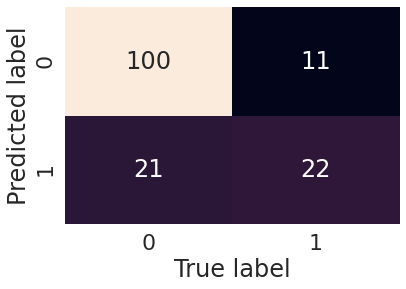

In [32]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [34]:
from sklearn.metrics import accuracy_score

In [36]:
print(accuracy_score(y_test,y_preds))

0.7922077922077922


In [37]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       111
           1       0.67      0.51      0.58        43

    accuracy                           0.79       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154



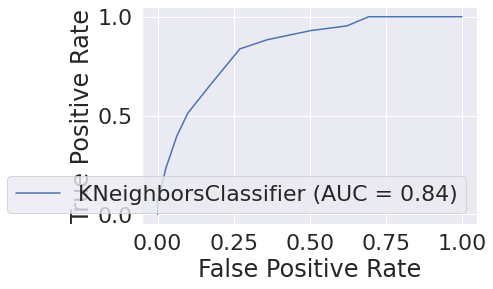

In [39]:
plot_roc_curve(knn_op,X_test,y_test)

In [41]:
import pickle
# Save trained model to file
pickle.dump(knn_op, open("Diabetes.pkl", "wb"))
loaded_model = pickle.load(open("Diabetes.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.7922077922077922